<a href="https://colab.research.google.com/github/mklbc/AI_project/blob/main/Lab_1_Kulubecioglu_Mehmet_Statistical_Methods_Of_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [3]:
# clustering.csv dosyasını oku
data = pd.read_csv('clustering.csv')

# İlk 5 satırı görüntüle
print(data.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             2333             1516.0        95.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Rural           N  
1             1.0         Urban           Y  
2             1.0   

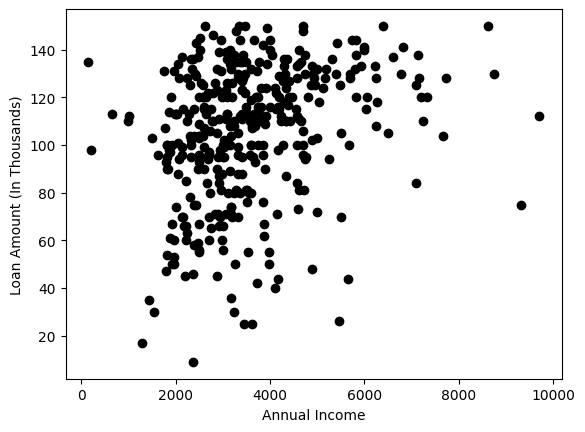

In [4]:
X = data[["LoanAmount", "ApplicantIncome"]]

# Veriyi görselleştirelim
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c='black')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()


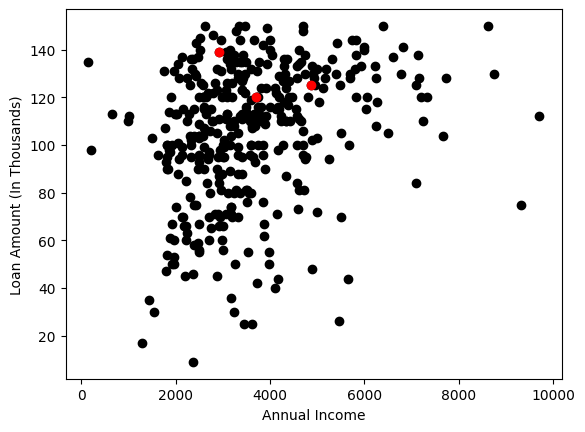

In [5]:
K = 3  # Küme sayısı
Centroids = X.sample(n=K)  # Rastgele seçilmiş küme merkezleri

# Veri noktalarını ve küme merkezlerini çizelim
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c='black')
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c='red')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()


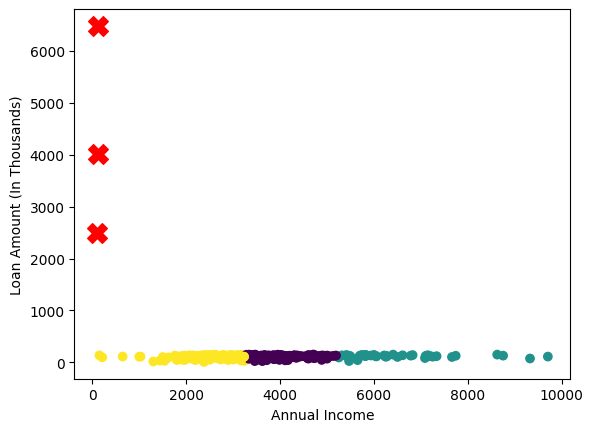

In [6]:
# K-Means modeli oluştur
kmeans = KMeans(n_clusters=K, init='k-means++', random_state=42)

# Modeli eğit ve tahmin yap
clusters = kmeans.fit_predict(X)

# Küme merkezlerini al
centroids = kmeans.cluster_centers_

# Sonuçları çizelim
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()


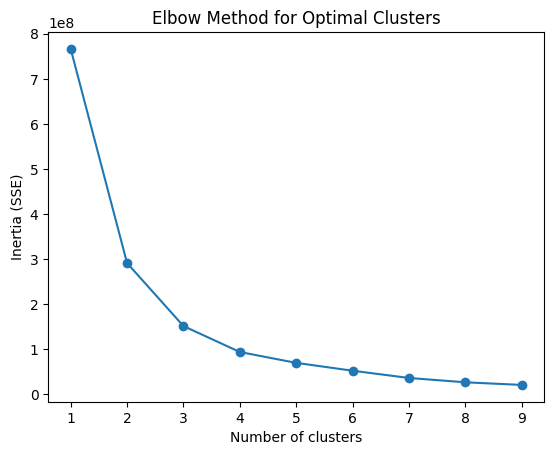

In [7]:
SSE = []  # Toplam hata kareleri listesi
for cluster in range(1, 10):  # 1'den 10'a kadar kümeler dene
    kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)  # Her küme için hata kareleri toplamı

# Grafiği çizelim
plt.plot(range(1, 10), SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


In [8]:
data = pd.read_csv('Wholesale customers data.csv')

# İlk 5 satırı görüntüle
print(data.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Standartlaştırılmış verinin istatistiklerine bakalım
pd.DataFrame(data_scaled).describe()


,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(data_scaled)

# Küme tahminlerini al
predictions = kmeans.predict(data_scaled)

# Küme sonuçlarını ekleyelim
data['Cluster'] = predictions

# Küme sayısına göre veri dağılımı
print(data['Cluster'].value_counts())


Cluster
1    200
0    126
3     90
4     14
2     10
Name: count, dtype: int64


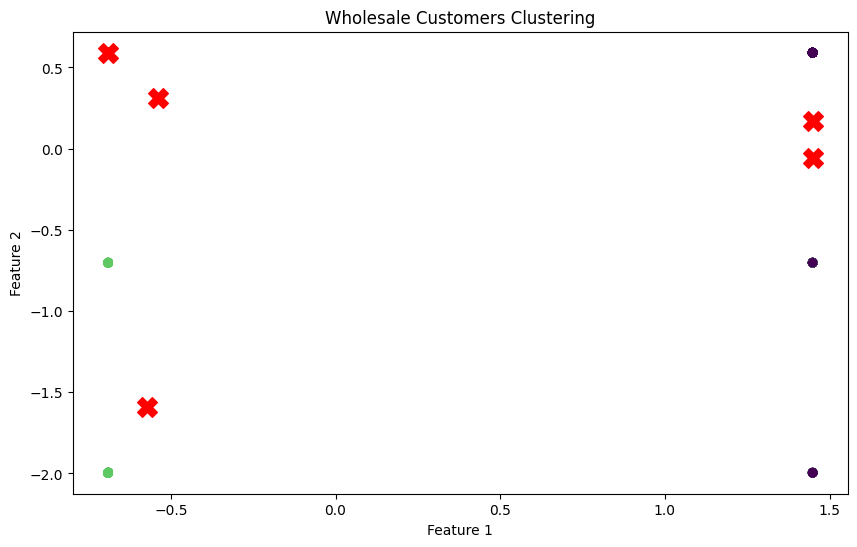

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=predictions, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Wholesale Customers Clustering')
plt.show()
